# **Cryptocurrencies and Stocks**

## **Team 8**

* Aniket Jana
* Arpit Mehta
* Saqib Saqib
* Varun Varun

#Data Preparation and EDA

## 1. Prepare the Data

In [ ]:
# Import modules for data analysis
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import *

In [ ]:
# Packages for calling Yahoo API and load assets
!pip install yahoo_fin
!pip install requests_html
import yahoo_fin.stock_info as si

     |████████████████████████████████| 81 kB 1.8 MB/s 
     |████████████████████████████████| 83 kB 1.0 MB/s 
     |████████████████████████████████| 127 kB 40.9 MB/s 
     |████████████████████████████████| 112 kB 50.3 MB/s 
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-py3-none-any.whl size=13502 sha256=ffe4f6cd058bf081d9699c3c2a198113940f00b9cfd2554cc3a9ba6d21424aa4
  Stored in directory: /root/.cache/pip/wheels/ed/f7/62/50ab6c9a0b5567267ab76a9daa9d06315704209b2c5d032031
  Created wheel for parse: filename=parse-1.19.0-py3-none-any.whl size=24591 sha256=0dbe00b97595c8a268532d3851a7c86082504ba8af6d44883e94e5627bdafe9b
  Stored in directory: /root/.cache/pip/wheels/9c/aa/cc/f2228050ccb40f22144b073f15a2c84f11204f29fc0dce028e
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6066 sha256=c36785904b4a6930a32f0c0a9633fcf81a3f5903586bd5bae2939b1996d6a6d3
  Stored in directory: /root/.cache/pip/wheels/73/ad/a4/0dff4a6ef231fc0dfa12ffbac2a36ce

## **Stocks**

**Market Cap requirement: \$2 Billion to $10 Billion**:

Below are the stocks chosen:

**BB** : Blackberry Limited  <br>
Market Cap at time of analysis:	3.309B<br>
https://finance.yahoo.com/quote/BB?p=BB&.tsrc=fin-srch<br><br>

**NVAX** : Novavax, Inc.<br>
Market Cap at time of analysis:	3.438B<br>
https://finance.yahoo.com/quote/NVAX?p=NVAX&.tsrc=fin-srch<br><br>

**TAL** : TAL Education Group<br>
Market Cap at time of analysis:	2.186B<br>
https://finance.yahoo.com/quote/TAL?p=TAL&.tsrc=fin-srch<br><br>

**VIPS** : Vipship Holdings Limited<br>
Market Cap at time of analysis:	5.201B<br>
https://finance.yahoo.com/quote/VIPS?p=VIPS&.tsrc=fin-srch<br><br>

## **Cryptocurrency**

**Market Cap requirement: \<= $1 Billion**:

Below are the cryptocurrencies chosen:

**DASH-USD** : Dash USD<br>
Market Cap at time of analysis:	986.039M<br>
https://finance.yahoo.com/quote/DASH-USD?p=DASH-USD&.tsrc=fin-srch<br><br>

**ZRX-USD** : 0x USD<br>
Market Cap at time of analysis:	684.263M<br>
https://finance.yahoo.com/quote/ZRX-USD?p=ZRX-USD&.tsrc=fin-srch<br><br>

**DCR-USD** : Decred USD<br>
Market Cap at time of analysis:	802.799M<br>
https://finance.yahoo.com/quote/DCR-USD?p=DCR-USD&.tsrc=fin-srch<br><br>

**WAXP-USD** : WAX USD<br>
Market Cap at time of analysis:	464.971M<br>
https://finance.yahoo.com/quote/WAXP-USD?p=WAXP-USD&.tsrc=fin-srch<br><br>

In [ ]:
# Assign the ticker list of assets that we want to scrap
tickers_list = ['BB','NVAX','TAL','VIPS','DASH-USD','ZRX-USD','DCR-USD','WAXP-USD']
# pull historical price data for each asset between the below time period for each day
dow_prices = {ticker : si.get_data(ticker,start_date = '01/01/2016',end_date='12/31/2020',interval='1d') for ticker in tickers_list}

In [ ]:
# take a peak!
dow_prices

{'BB':             open  high   low  close  adjclose    volume ticker
 2016-01-04  9.17  9.22  8.90   9.14      9.14  10952500     BB
 2016-01-05  9.09  9.17  8.83   8.86      8.86   7446800     BB
 2016-01-06  8.70  8.93  8.65   8.74      8.74   7696500     BB
 2016-01-07  8.59  8.63  7.85   8.00      8.00  13901200     BB
 2016-01-08  8.17  8.23  7.70   7.71      7.71  10399300     BB
 ...          ...   ...   ...    ...       ...       ...    ...
 2020-12-23  7.30  7.33  7.08   7.09      7.09   9115500     BB
 2020-12-24  7.12  7.24  7.05   7.06      7.06   6088300     BB
 2020-12-28  7.10  7.13  6.85   6.88      6.88   9820100     BB
 2020-12-29  6.98  7.00  6.68   6.77      6.77  11284200     BB
 2020-12-30  6.79  6.81  6.60   6.67      6.67   9434900     BB
 
 [1258 rows x 7 columns],
 'DASH-USD':                   open        high         low       close    adjclose  \
 2017-11-09  315.476990  337.226013  311.819000  326.007996  326.007996   
 2017-11-10  325.265991  353.358002 

In [ ]:
# let's extract just the data we need (adjclose)
# get the adjclose price for the BB (one sample)
prep_data = pd.DataFrame(dow_prices['BB']['adjclose']).rename(columns = {"adjclose":"BB"})

# combine all the tickers (all the rest of the samples)
for i in tickers_list[1:]:
  prep_data[i] = pd.DataFrame(dow_prices[i]['adjclose'])
prep_data

,BB,NVAX,TAL,VIPS,DASH-USD,ZRX-USD,DCR-USD,WAXP-USD
2016-01-04,9.14,157.600006,7.497889,14.050000,NaN,NaN,NaN,NaN
2016-01-05,8.86,157.800003,7.577565,14.530000,NaN,NaN,NaN,NaN
2016-01-06,8.74,150.800003,7.602464,14.500000,NaN,NaN,NaN,NaN
2016-01-07,8.00,138.399994,7.360115,13.990000,NaN,NaN,NaN,NaN
2016-01-08,7.71,141.399994,7.292058,13.580000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2020-12-23,7.09,127.650002,68.860001,25.730000,91.116631,0.330287,31.894436,0.034245
2020-12-24,7.06,129.339996,69.709999,26.309999,98.342682,0.364226,35.016968,0.035829
2020-12-28,6.88,116.849998,68.000000,25.790001,107.270004,0.376743,40.063000,0.037778
2020-12-29,6.77,120.269997,68.599998,26.080000,104.040588,0.365462,38.157211,0.036074


In [ ]:
# get the number of rows
prep_data.shape

(1258, 8)

In [ ]:
# Check for missing values in any of the tickers
prep_data.isnull().sum()

BB            0
NVAX          0
TAL           0
VIPS          0
DASH-USD    468
ZRX-USD     408
DCR-USD     468
WAXP-USD    497
dtype: int64

In [ ]:
# create return features for each ticker, 
# we will just use a pct_change as the return
return_data = pd.DataFrame()
for i in tickers_list:
  return_data[i] = prep_data[i].pct_change()
# drop the na records
return_data.dropna(inplace=True)
# check the data
return_data

,BB,NVAX,TAL,VIPS,DASH-USD,ZRX-USD,DCR-USD,WAXP-USD
2017-12-22,-0.016949,0.008696,0.003756,0.010762,-0.178287,-0.137519,-0.183229,-0.781849
2017-12-26,-0.027586,0.025862,0.001020,-0.000819,0.037167,0.298122,0.236496,-0.108656
2017-12-27,-0.005319,0.058824,0.014951,-0.017213,-0.026937,0.033928,0.011837,-0.070000
2017-12-28,0.011586,0.031746,-0.024774,-0.006672,-0.024641,-0.034329,-0.069668,-0.067972
2017-12-29,-0.015859,-0.046154,0.019911,-0.015953,-0.010874,0.057777,0.118105,0.324936
...,...,...,...,...,...,...,...,...
2020-12-23,-0.013908,0.106440,-0.000435,0.000000,-0.136776,-0.119983,-0.068285,-0.141493
2020-12-24,-0.004231,0.013239,0.012344,0.022542,0.079306,0.102756,0.097902,0.046255
2020-12-28,-0.025496,-0.096567,-0.024530,-0.019764,0.090778,0.034366,0.144102,0.054397
2020-12-29,-0.015988,0.029268,0.008824,0.011245,-0.030105,-0.029943,-0.047570,-0.045106


In [ ]:
# check new rows
return_data.shape

(760, 8)

In [ ]:
# Print the info of data set
return_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 760 entries, 2017-12-22 to 2020-12-30
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BB        760 non-null    float64
 1   NVAX      760 non-null    float64
 2   TAL       760 non-null    float64
 3   VIPS      760 non-null    float64
 4   DASH-USD  760 non-null    float64
 5   ZRX-USD   760 non-null    float64
 6   DCR-USD   760 non-null    float64
 7   WAXP-USD  760 non-null    float64
dtypes: float64(8)
memory usage: 53.4 KB


# Visualize the Time Series

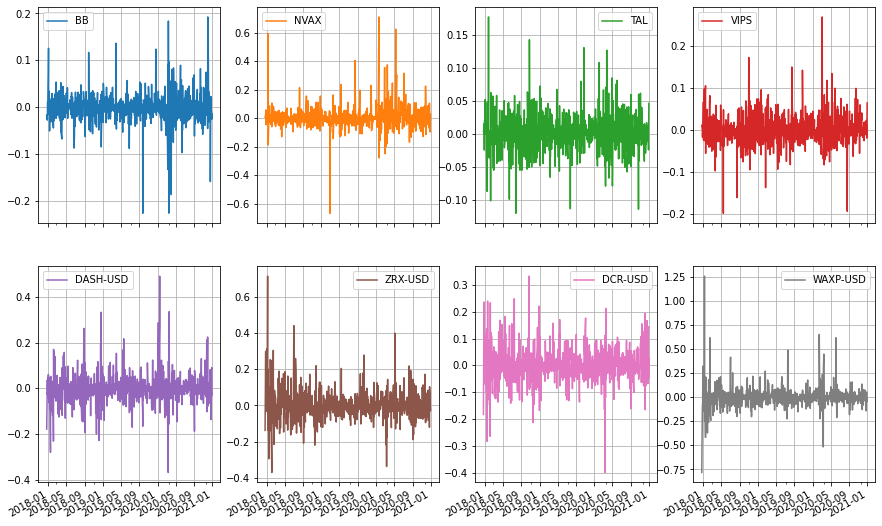

In [ ]:
# Plot all ticker data and see the distribution
return_data.plot(subplots=True,
        grid=True, 
        layout=(3,4),
         figsize=(15,15))
# Print the plot
plt.show()

In [ ]:
# Calculate the cumulative daily returns using pandas cumprod function
df_cum_daily_returns = (1 + return_data).cumprod() - 1
df_cum_daily_returns = df_cum_daily_returns.reset_index()
# Display the cumulative daily returns
df_cum_daily_returns

,index,BB,NVAX,TAL,VIPS,DASH-USD,ZRX-USD,DCR-USD,WAXP-USD
0,2017-12-22,-0.016949,0.008696,0.003756,0.010762,-0.178287,-0.137519,-0.183229,-0.781849
1,2017-12-26,-0.044068,0.034783,0.004780,0.009934,-0.147747,0.119605,0.009934,-0.805552
2,2017-12-27,-0.049153,0.095652,0.019802,-0.007450,-0.170704,0.157591,0.021888,-0.819163
3,2017-12-28,-0.038136,0.130435,-0.005463,-0.014073,-0.191139,0.117852,-0.049305,-0.831455
4,2017-12-29,-0.053390,0.078261,0.014339,-0.029801,-0.199934,0.182438,0.062977,-0.776689
...,...,...,...,...,...,...,...,...,...
755,2020-12-23,-0.399153,4.550000,1.350973,1.129967,-0.936496,-0.429093,-0.660035,-0.992573
756,2020-12-24,-0.401695,4.623478,1.379993,1.177980,-0.931460,-0.370428,-0.626751,-0.992229
757,2020-12-28,-0.416949,4.080435,1.321611,1.134934,-0.925238,-0.348793,-0.572965,-0.991806
758,2020-12-29,-0.426271,4.229130,1.342096,1.158940,-0.927489,-0.368292,-0.593279,-0.992176


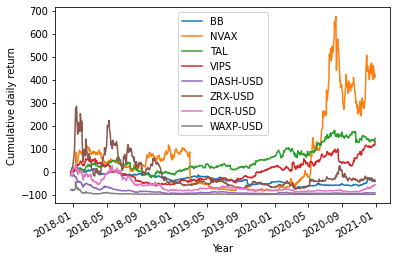

In [ ]:
#Plotting cumulative daily returns
dailyreturnplot=df_cum_daily_returns.copy()
dailyreturnplot=dailyreturnplot.set_index('index')
dailyreturnplot=dailyreturnplot*100
#Plot, Label and print the graph
dailyreturnplot.plot()
plt.xlabel('Year')
plt.ylabel('Cumulative daily return')
plt.show()

In [ ]:
#Last record of dataframe multiplied by 100 is giving us the percentage change of the stock prices for our entire period, as shown below
cum_return_entire_period = df_cum_daily_returns.iloc[:, 1:].tail(1)
cum_return_entire_period * 100

,BB,NVAX,TAL,VIPS,DASH-USD,ZRX-USD,DCR-USD,WAXP-USD
759,-43.474577,417.217387,144.998293,129.801328,-92.913142,-37.814115,-58.245256,-99.22823


In [ ]:
# Store in a new dataframe
df = return_data

In [ ]:
# here's the covariance matrix
Covariance_matrix = df.cov()
Covariance_matrix

,BB,NVAX,TAL,VIPS,DASH-USD,ZRX-USD,DCR-USD,WAXP-USD
BB,0.001112,0.000100,0.000258,0.000200,0.000336,0.000505,0.000316,0.000301
NVAX,0.000100,0.006635,0.000146,0.000368,0.000248,0.000343,0.000052,-0.000033
TAL,0.000258,0.000146,0.000876,0.000329,0.000097,0.000261,0.000055,0.000230
VIPS,0.000200,0.000368,0.000329,0.001386,0.000058,0.000461,0.000063,0.000023
DASH-USD,0.000336,0.000248,0.000097,0.000058,0.004393,0.002967,0.002688,0.002996
ZRX-USD,0.000505,0.000343,0.000261,0.000461,0.002967,0.006893,0.002991,0.004034
DCR-USD,0.000316,0.000052,0.000055,0.000063,0.002688,0.002991,0.004252,0.002674
WAXP-USD,0.000301,-0.000033,0.000230,0.000023,0.002996,0.004034,0.002674,0.011930


In [ ]:
# Here's the correlation matrix
Corr_matrix = df.corr()
Corr_matrix

,BB,NVAX,TAL,VIPS,DASH-USD,ZRX-USD,DCR-USD,WAXP-USD
BB,1.000000,0.036761,0.260970,0.161342,0.152037,0.182512,0.145110,0.082502
NVAX,0.036761,1.000000,0.060566,0.121236,0.045973,0.050770,0.009839,-0.003753
TAL,0.260970,0.060566,1.000000,0.298644,0.049482,0.106338,0.028257,0.071229
VIPS,0.161342,0.121236,0.298644,1.000000,0.023545,0.149278,0.025817,0.005717
DASH-USD,0.152037,0.045973,0.049482,0.023545,1.000000,0.539239,0.621987,0.413883
ZRX-USD,0.182512,0.050770,0.106338,0.149278,0.539239,1.000000,0.552374,0.444895
DCR-USD,0.145110,0.009839,0.028257,0.025817,0.621987,0.552374,1.000000,0.375511
WAXP-USD,0.082502,-0.003753,0.071229,0.005717,0.413883,0.444895,0.375511,1.000000


# Non-Linear Optimization: Portfolio Allocation

In [ ]:
# install pyomo
!pip install -q pyomo
from pyomo.environ import *

try:
    import google.colab
    try:
        from pyomo.environ import *
    except:
        !pip install -q pyomo
    if not 'ipopt_executable' in vars():
        !wget -N -q "https://ampl.com/dl/open/ipopt/ipopt-linux64.zip"
        !unzip -o -q ipopt-linux64
        ipopt_executable = '/content/ipopt' # THIS IS NEW! We are using the IPOPT Solver.
except:
    pass

     |████████████████████████████████| 9.6 MB 6.0 MB/s 
     |████████████████████████████████| 49 kB 4.1 MB/s 


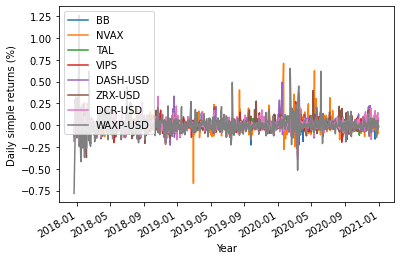

In [ ]:
#Visualize past returns of all tickers
return_data.plot()
plt.xlabel('Year')
plt.ylabel('Daily simple returns (%)')
plt.show()
#we get simple returns for each day for each ticker.

In [ ]:
# Print the first few rows of the data
return_data.head()

,BB,NVAX,TAL,VIPS,DASH-USD,ZRX-USD,DCR-USD,WAXP-USD
2017-12-22,-0.016949,0.008696,0.003756,0.010762,-0.178287,-0.137519,-0.183229,-0.781849
2017-12-26,-0.027586,0.025862,0.001020,-0.000819,0.037167,0.298122,0.236496,-0.108656
2017-12-27,-0.005319,0.058824,0.014951,-0.017213,-0.026937,0.033928,0.011837,-0.070000
2017-12-28,0.011586,0.031746,-0.024774,-0.006672,-0.024641,-0.034329,-0.069668,-0.067972
2017-12-29,-0.015859,-0.046154,0.019911,-0.015953,-0.010874,0.057777,0.118105,0.324936


In [ ]:
# here's the covariance matrix
Covariance_matrix = return_data.cov()
Covariance_matrix
# Display the covariance matrix
Covariance_matrix.style.background_gradient(cmap='coolwarm')

,BB,NVAX,TAL,VIPS,DASH-USD,ZRX-USD,DCR-USD,WAXP-USD
BB,0.001112,0.000100,0.000258,0.000200,0.000336,0.000505,0.000316,0.000301
NVAX,0.000100,0.006635,0.000146,0.000368,0.000248,0.000343,0.000052,-0.000033
TAL,0.000258,0.000146,0.000876,0.000329,0.000097,0.000261,0.000055,0.000230
VIPS,0.000200,0.000368,0.000329,0.001386,0.000058,0.000461,0.000063,0.000023
DASH-USD,0.000336,0.000248,0.000097,0.000058,0.004393,0.002967,0.002688,0.002996
ZRX-USD,0.000505,0.000343,0.000261,0.000461,0.002967,0.006893,0.002991,0.004034
DCR-USD,0.000316,0.000052,0.000055,0.000063,0.002688,0.002991,0.004252,0.002674
WAXP-USD,0.000301,-0.000033,0.000230,0.000023,0.002996,0.004034,0.002674,0.011930


In [ ]:
# creating covariance table on stock return dataframe
df_cov = df.cov()
print('Covariance Matrix:')
print(df_cov)
print('\n') # return/blank line

# create the average of each stock
# these are the objective function COEFFICIENTS!
df_return = df.mean()
print('Average Return:')
print(df_return)

Covariance Matrix:
                BB      NVAX       TAL      VIPS  DASH-USD   ZRX-USD  \
BB        0.001112  0.000100  0.000258  0.000200  0.000336  0.000505   
NVAX      0.000100  0.006635  0.000146  0.000368  0.000248  0.000343   
TAL       0.000258  0.000146  0.000876  0.000329  0.000097  0.000261   
VIPS      0.000200  0.000368  0.000329  0.001386  0.000058  0.000461   
DASH-USD  0.000336  0.000248  0.000097  0.000058  0.004393  0.002967   
ZRX-USD   0.000505  0.000343  0.000261  0.000461  0.002967  0.006893   
DCR-USD   0.000316  0.000052  0.000055  0.000063  0.002688  0.002991   
WAXP-USD  0.000301 -0.000033  0.000230  0.000023  0.002996  0.004034   

           DCR-USD  WAXP-USD  
BB        0.000316  0.000301  
NVAX      0.000052 -0.000033  
TAL       0.000055  0.000230  
VIPS      0.000063  0.000023  
DASH-USD  0.002688  0.002996  
ZRX-USD   0.002991  0.004034  
DCR-USD   0.004252  0.002674  
WAXP-USD  0.002674  0.011930  


Average Return:
BB         -0.000184
NVAX        0.

## Portfolio Optimization modeling

In [ ]:
from pyomo.environ import *
m = ConcreteModel()

# defining variables
# each one is a stock
m.bb = Var(within=NonNegativeReals, bounds=(0,1))
m.nvax = Var(within=NonNegativeReals, bounds=(0,1))
m.tal = Var(within=NonNegativeReals, bounds=(0,1))
m.vips = Var(within=NonNegativeReals, bounds=(0,1))
m.dash_usd = Var(within=NonNegativeReals, bounds=(0,1))
m.zrx_usd = Var(within=NonNegativeReals, bounds=(0,1))
m.dcr_usd = Var(within=NonNegativeReals, bounds=(0,1))
m.waxp_usd = Var(within=NonNegativeReals, bounds=(0,1))

In [ ]:
# Our Goal : Portfolio allocation strategy to distribute amount across stocks and cryptocurencies to get maximum value
# declare objective
m.objective = Objective(expr =               
                        m.bb*df_return[0] + 
                        m.nvax*df_return[1] + 
                        m.tal*df_return[2] +
                        m.vips*df_return[3] + 
                        m.dash_usd*df_return[4]+
                        m.zrx_usd*df_return[5]+
                        m.dcr_usd*df_return[6]+
                        m.waxp_usd*df_return[7],
                        sense=maximize) # yes, we want to MAX our returns!

# declare constraints
# 1. Sum of all porportions = 1
m.sum_proportions = Constraint(expr = m.bb + m.nvax + m.tal + m.vips + m.dash_usd + m.zrx_usd +
                               m.dcr_usd + m.waxp_usd == 1)

# 2. Set lower limit for risk (to maximize profit)
m.total_risk = Constraint(expr = m.bb + m.nvax + m.tal + m.vips + m.dash_usd + m.zrx_usd +
                               m.dcr_usd + m.waxp_usd >= 0.0)

In [ ]:
# creating calculations table for calculate the risk
# 3. Calculate risk
def calc_risk(m):
  variables = m.bb,m.nvax,m.tal,m.vips,m.dash_usd,m.zrx_usd,m.dcr_usd,m.waxp_usd
  tickers = ['BB', 'NVAX', 'TAL', 'VIPS', 'DASH-USD', 'ZRX-USD', 'DCR-USD', 'WAXP-USD']
  risk_exp = 0
  for i in range(len(variables)):
    for j in range(len(variables)):
      risk_exp += variables[i]*df_cov.at[tickers[i],tickers[j]]*variables[j]
  return risk_exp

# We are going to use this expression to compute the risk
expr_risk = calc_risk(m)

# 3. Max risk should be less than 0.01
max_risk = 0.01
# Sequence of risk levels
risk_limits = np.arange(0.001, max_risk, 0.0001) # take tiny steps
risk_limits

array([0.001 , 0.0011, 0.0012, 0.0013, 0.0014, 0.0015, 0.0016, 0.0017,
       0.0018, 0.0019, 0.002 , 0.0021, 0.0022, 0.0023, 0.0024, 0.0025,
       0.0026, 0.0027, 0.0028, 0.0029, 0.003 , 0.0031, 0.0032, 0.0033,
       0.0034, 0.0035, 0.0036, 0.0037, 0.0038, 0.0039, 0.004 , 0.0041,
       0.0042, 0.0043, 0.0044, 0.0045, 0.0046, 0.0047, 0.0048, 0.0049,
       0.005 , 0.0051, 0.0052, 0.0053, 0.0054, 0.0055, 0.0056, 0.0057,
       0.0058, 0.0059, 0.006 , 0.0061, 0.0062, 0.0063, 0.0064, 0.0065,
       0.0066, 0.0067, 0.0068, 0.0069, 0.007 , 0.0071, 0.0072, 0.0073,
       0.0074, 0.0075, 0.0076, 0.0077, 0.0078, 0.0079, 0.008 , 0.0081,
       0.0082, 0.0083, 0.0084, 0.0085, 0.0086, 0.0087, 0.0088, 0.0089,
       0.009 , 0.0091, 0.0092, 0.0093, 0.0094, 0.0095, 0.0096, 0.0097,
       0.0098, 0.0099])

In [ ]:
# number of risk limits
np.count_nonzero(risk_limits)

90

In [ ]:
from pyomo.opt import SolverStatus, TerminationCondition

# updating risk contraint for each limit and then solving the problem
param_analysis = {} # key=risk, value =stock allocations 
returns = {} # key=risk, value = return
for r in risk_limits:
  # Remove constraint to avoid error messages
  m.del_component(m.total_risk)
  m.total_risk = Constraint(expr = expr_risk <= r)
  # run solver
  result = SolverFactory('ipopt', executable=ipopt_executable).solve(m)

  # If solution is not feasible, ignore this run
  if result.solver.termination_condition == TerminationCondition.infeasible:
    continue

  result = result.write()

  # store our allocation proportions
  param_analysis[r] = [m.bb(),m.nvax(),m.tal(),m.vips(),m.dash_usd(),m.zrx_usd(),m.dcr_usd(),m.waxp_usd()]
  # store our returns
  returns[r] =  m.bb()*df_return[0] + m.nvax()*df_return[1] + m.tal()*df_return[2] +m.vips()*df_return[3] + m.dash_usd()* df_return[4]+m.zrx_usd()*df_return[5] + m.dcr_usd()*df_return[6] + m.waxp_usd()*df_return[7]


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 8
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.12.13\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.029097557067871094
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
# ====

## 2. Visualisation of optimal stock allocation 

<Figure size 144000x160000 with 0 Axes>

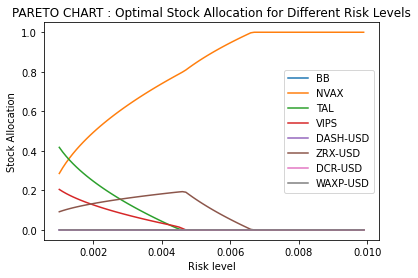

In [ ]:
# generating the dataframe for proportions of the portfolio for each risk limit
from matplotlib.pyplot import figure
figure(figsize=(1800, 2000), dpi=80)
param_analysis = pd.DataFrame.from_dict(param_analysis, orient='index')
param_analysis.columns = ['BB', 'NVAX', 'TAL', 'VIPS', 'DASH-USD', 'ZRX-USD', 'DCR-USD', 'WAXP-USD']
# Plot the distribution
param_analysis.plot()
# Add title
plt.title('PARETO CHART : Optimal Stock Allocation for Different Risk Levels')
# Add x and y labels
plt.xlabel('Risk level')
plt.ylabel('Stock Allocation')
# Show the plot
plt.show()


In [ ]:
# subset
risk = list(returns.keys()) # coerce dict_keys to a list
print(risk)
# reqard
reward = list(returns.values()) # coerce dict_values to a list
print(reward)

[0.001, 0.0011, 0.0012000000000000001, 0.0013000000000000002, 0.0014000000000000002, 0.0015000000000000002, 0.0016000000000000003, 0.0017000000000000003, 0.0018000000000000004, 0.0019000000000000004, 0.0020000000000000005, 0.0021000000000000003, 0.0022000000000000006, 0.002300000000000001, 0.0024000000000000007, 0.0025000000000000005, 0.0026000000000000007, 0.002700000000000001, 0.002800000000000001, 0.0029000000000000007, 0.003000000000000001, 0.003100000000000001, 0.003200000000000001, 0.003300000000000001, 0.003400000000000001, 0.0035000000000000014, 0.003600000000000001, 0.003700000000000001, 0.0038000000000000013, 0.0039000000000000016, 0.004000000000000002, 0.004100000000000001, 0.0042000000000000015, 0.004300000000000002, 0.004400000000000001, 0.004500000000000001, 0.004600000000000002, 0.004700000000000002, 0.004800000000000002, 0.004900000000000002, 0.005000000000000002, 0.005100000000000002, 0.005200000000000002, 0.005300000000000002, 0.005400000000000002, 0.00550000000000000

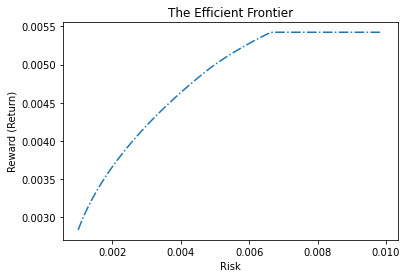

In [ ]:
# plot! pylab makes it easy
from pylab import *
plot(risk, reward, '-.')
title('The Efficient Frontier')
xlabel('Risk')
ylabel('Reward (Return)')
plt.show()

# Monte Carlo Simulation

Based on the pareto chart that we see above, we see that there are 4 assets that can be picked for a risk level of 0.001 or 0.002 where the rest of the 4 assets go to 0 returns with increasing risks. 

The 4 assests that do not converge to a 0 returns at a risk of until 0.025 are the following 

["NVAX","TAL","VIPS","ZRX-USD"] are the assets that are under consideration for the monte carlo simulation.

The objective of this simulation is to find the probability with which our portfolio with the chosen stock proportion will lose money

In [ ]:
# retrieve covariance matrix
df_cov

,BB,NVAX,TAL,VIPS,DASH-USD,ZRX-USD,DCR-USD,WAXP-USD
BB,0.001112,0.000100,0.000258,0.000200,0.000336,0.000505,0.000316,0.000301
NVAX,0.000100,0.006635,0.000146,0.000368,0.000248,0.000343,0.000052,-0.000033
TAL,0.000258,0.000146,0.000876,0.000329,0.000097,0.000261,0.000055,0.000230
VIPS,0.000200,0.000368,0.000329,0.001386,0.000058,0.000461,0.000063,0.000023
DASH-USD,0.000336,0.000248,0.000097,0.000058,0.004393,0.002967,0.002688,0.002996
ZRX-USD,0.000505,0.000343,0.000261,0.000461,0.002967,0.006893,0.002991,0.004034
DCR-USD,0.000316,0.000052,0.000055,0.000063,0.002688,0.002991,0.004252,0.002674
WAXP-USD,0.000301,-0.000033,0.000230,0.000023,0.002996,0.004034,0.002674,0.011930


In [ ]:
# for the following list of ["NVAX","TAL","VIPS","ZRX-USD"], we must subset the co-variance matrix
df_cov_ss=df_cov.loc[["NVAX","TAL","VIPS","ZRX-USD"],["NVAX","TAL","VIPS","ZRX-USD"]]

In [ ]:
# convert the array to a list
risks_1=(risk_limits).tolist()
#print the list to observe the values of risk_levels
risks_1

[0.001,
 0.0011,
 0.0012000000000000001,
 0.0013000000000000002,
 0.0014000000000000002,
 0.0015000000000000002,
 0.0016000000000000003,
 0.0017000000000000003,
 0.0018000000000000004,
 0.0019000000000000004,
 0.0020000000000000005,
 0.0021000000000000003,
 0.0022000000000000006,
 0.002300000000000001,
 0.0024000000000000007,
 0.0025000000000000005,
 0.0026000000000000007,
 0.002700000000000001,
 0.002800000000000001,
 0.0029000000000000007,
 0.003000000000000001,
 0.003100000000000001,
 0.003200000000000001,
 0.003300000000000001,
 0.003400000000000001,
 0.0035000000000000014,
 0.003600000000000001,
 0.003700000000000001,
 0.0038000000000000013,
 0.0039000000000000016,
 0.004000000000000002,
 0.004100000000000001,
 0.0042000000000000015,
 0.004300000000000002,
 0.004400000000000001,
 0.004500000000000001,
 0.004600000000000002,
 0.004700000000000002,
 0.004800000000000002,
 0.004900000000000002,
 0.005000000000000002,
 0.005100000000000002,
 0.005200000000000002,
 0.005300000000000002

In [ ]:
#0.0020000000000000005 is the closest risk values we had identified from the pareto chart
print(risks_1.index(0.0020000000000000005))
print(risks_1.index(0.003000000000000001))
print(risks_1.index(0.004000000000000002))

10
20
30


In [ ]:
# retrieve the main returns value from the first part of the optimisation analysis
df_return

BB         -0.000184
NVAX        0.005423
TAL         0.001615
VIPS        0.001784
DASH-USD   -0.001309
ZRX-USD     0.002676
DCR-USD     0.001004
WAXP-USD   -0.000447
dtype: float64

In [ ]:
df_return_ss = df_return.iloc[[1,2,3,5]]
df_return_ss

NVAX       0.005423
TAL        0.001615
VIPS       0.001784
ZRX-USD    0.002676
dtype: float64

## The following snippets of code were generated to check for the loss % for different values of risk levels. 

---



In [ ]:
# to see if this risk value give us exactl 4 stocks with non-zero proportions
param_analysis.loc[0.0020000000000000005]

BB          1.558404e-06
NVAX        4.944379e-01
TAL         2.457002e-01
VIPS        1.263157e-01
DASH-USD    7.851267e-07
ZRX-USD     1.335391e-01
DCR-USD     3.754480e-06
WAXP-USD    1.067751e-06
Name: 0.0020000000000000005, dtype: float64

In [ ]:
# to retrieve the proportion of NVAX, TAL, VIPS and ZRX-USD, we use the indices 1, 2, 3 and 5
#let us fix the risk level to be [0.0020000000000000005]
asset1 = param_analysis.loc[0.0020000000000000005][1]
asset2 = param_analysis.loc[0.0020000000000000005][2]
asset3 = param_analysis.loc[0.0020000000000000005][3]
asset4 = param_analysis.loc[0.0020000000000000005][5]
print(asset1)
print(asset2)
print(asset3)
print(asset4)

0.4944378637890113
0.24570015290904418
0.12631567112292533
0.13353914641633263


In [ ]:
# run the simulation
simulations = 10000
sum_of_returns = list()
# the loss_val is a counter that will increment everytime sum of return*proprotion for 4 chosen stocks is less than 1
# for the simulation, we need to get the value of return for each of the chosen asset 
# this is done using the np multivariate function that takes into account the mean of returns and covariance for the assets to compute the values.
# the result of this function is a list of 4 asset value or return values 

loss_value = 0 
for i in range(simulations):
  asset_list=np.random.multivariate_normal(df_return_ss,df_cov_ss)
#the np function will choose a random asset value for the given covariance and return for a particular day
#this variable gets stored with newly cmputed value for given returns, covarinace and proportion
  value_asset=(asset_list[0]*asset1)+(asset_list[1]*asset2)+(asset_list[2]*asset3)+(asset_list[3]*asset4)
  sum_of_returns.append(value_asset)
  if(value_asset<0):
    loss_value+=1
  else:
    continue
loss_percent = round((loss_value/simulations)*100,2)
print("The probability percentage of losing money in this portfolio for a risk of 0.0020000000000000005 is:", loss_percent,"%")

The probability percentage of losing money in this portfolio for a risk of 0.0020000000000000005 is: 46.97 %


## Density Plot Graph

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


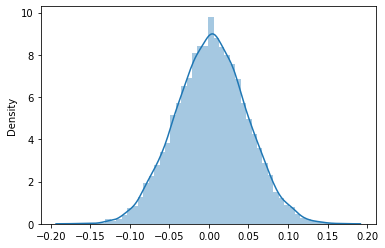

In [ ]:
import seaborn as sns
sns.distplot(sum_of_returns)

## S&P 500 and Dow Jones Index Analysis

Evaluate the quality of a portfolio allocation with four assets. Compare your results with the S&P 500 or Dow Jones Index in the same period.

In [ ]:
#Scrapping monthly Stock data from Yahoo Finance from Jan 1 2021 to Jan 1, 2022

# Assign the ticker list that we want to scrap
#Stocks selected are "NVAX","TAL","VIPS","ZRX-USD"
tickers_list = ["NVAX","TAL","VIPS","ZRX-USD","^GSPC","^DJI"]
# pull historical price data for each stocks to match with our news score later
sp_prices = {ticker : si.get_data(ticker,start_date = '01/01/2021',end_date='01/01/2022',interval='1mo') for ticker in tickers_list}

In [ ]:
#see results
sp_prices

{'NVAX':                   open        high         low       close    adjclose  \
 2021-01-01  112.699997  235.500000  109.010002  220.940002  220.940002   
 2021-02-01  242.520004  331.679993  212.770004  231.229996  231.229996   
 2021-03-01  238.240005  242.509995  147.389999  181.309998  181.309998   
 2021-04-01  183.500000  263.670013  170.490005  236.929993  236.929993   
 2021-05-01  238.500000  239.789993  117.120003  147.619995  147.619995   
 2021-06-01  149.139999  229.500000  141.050003  212.309998  212.309998   
 2021-07-01  215.000000  230.899994  172.009995  179.330002  179.330002   
 2021-08-01  183.820007  260.000000  177.169998  238.539993  238.539993   
 2021-09-01  238.000000  277.799988  198.000000  207.309998  207.309998   
 2021-10-01  190.910004  192.399994  121.349998  148.830002  148.830002   
 2021-11-01  159.559998  229.000000  146.110001  208.630005  208.630005   
 2021-12-01  196.500000  236.500000  138.250000  143.070007  143.070007   
 
               

In [ ]:
#extracting just the data we need
sp_prep = pd.DataFrame(sp_prices['NVAX']['adjclose']).rename(columns = {"adjclose":"NVAX"})

# combine all the tickers (all the rest of the samples)
for i in tickers_list[1:]:
  sp_prep[i] = pd.DataFrame(sp_prices[i]['adjclose'])
sp_prep

,NVAX,TAL,VIPS,ZRX-USD,^GSPC,^DJI
2021-01-01,220.940002,76.879997,27.420000,0.700008,3714.239990,29982.619141
2021-02-01,231.229996,77.540001,37.320000,1.208579,3811.149902,30932.369141
2021-03-01,181.309998,53.849998,29.860001,1.910862,3972.889893,32981.550781
2021-04-01,236.929993,56.950001,30.770000,1.801276,4181.169922,33874.851562
2021-05-01,147.619995,39.970001,23.129999,1.021003,4204.109863,34529.449219
2021-06-01,212.309998,25.230000,20.080000,0.740101,4297.500000,34502.511719
2021-07-01,179.330002,6.070000,16.629999,0.818402,4395.259766,34935.468750
2021-08-01,238.539993,5.320000,14.790000,1.065450,4522.680176,35360.730469
2021-09-01,207.309998,4.840000,11.140000,0.902637,4307.540039,33843.921875
2021-10-01,148.830002,4.090000,11.160000,1.183866,4605.379883,35819.558594


In [ ]:
# create return features for each ticker, 
# we will just use a pct_change as the return
return_sp = pd.DataFrame()
for i in tickers_list:
  return_sp[i] = sp_prep[i].pct_change()
# drop the na records
return_sp.dropna(inplace=True)
return_sp

,NVAX,TAL,VIPS,ZRX-USD,^GSPC,^DJI
2021-02-01,0.046574,0.008585,0.361050,0.726522,0.026091,0.031677
2021-03-01,-0.215889,-0.305520,-0.199893,0.581082,0.042439,0.066247
2021-04-01,0.306767,0.057567,0.030476,-0.057349,0.052425,0.027085
2021-05-01,-0.376947,-0.298156,-0.248294,-0.433178,0.005486,0.019324
2021-06-01,0.438220,-0.368777,-0.131863,-0.275124,0.022214,-0.000780
2021-07-01,-0.155339,-0.759413,-0.171813,0.105798,0.022748,0.012549
2021-08-01,0.330173,-0.123558,-0.110643,0.301866,0.028990,0.012173
2021-09-01,-0.130921,-0.090226,-0.246788,-0.152811,-0.047569,-0.042895
2021-10-01,-0.282090,-0.154959,0.001795,0.311564,0.069144,0.058375
2021-11-01,0.401801,0.266504,-0.124552,-0.001356,-0.008334,-0.037294


In [ ]:
#drop index to avoid issues while running model
return_sp.reset_index(drop=True, inplace=True)
return_sp

,NVAX,TAL,VIPS,ZRX-USD,^GSPC,^DJI
0,0.046574,0.008585,0.361050,0.726522,0.026091,0.031677
1,-0.215889,-0.305520,-0.199893,0.581082,0.042439,0.066247
2,0.306767,0.057567,0.030476,-0.057349,0.052425,0.027085
3,-0.376947,-0.298156,-0.248294,-0.433178,0.005486,0.019324
4,0.438220,-0.368777,-0.131863,-0.275124,0.022214,-0.000780
5,-0.155339,-0.759413,-0.171813,0.105798,0.022748,0.012549
6,0.330173,-0.123558,-0.110643,0.301866,0.028990,0.012173
7,-0.130921,-0.090226,-0.246788,-0.152811,-0.047569,-0.042895
8,-0.282090,-0.154959,0.001795,0.311564,0.069144,0.058375
9,0.401801,0.266504,-0.124552,-0.001356,-0.008334,-0.037294


In [ ]:
# Calculate asset returns
assets_returns = (return_sp["NVAX"].sum())*asset1 + (return_sp["TAL"].sum())*asset2 + (return_sp["VIPS"].sum())*asset3 + (return_sp["ZRX-USD"].sum())*asset4
# Get S&P returns
sp_ret = return_sp["^GSPC"].sum()
# Get Dow Jones returns
dj_ret = return_sp["^DJI"].sum()
performance_report = pd.DataFrame({'Returns':[sp_ret,dj_ret,assets_returns]}, index=['S&P 500','Dow Jones','Portfolio Chosen'])
# Print performance report
performance_report

,Returns
S&P 500,0.257248
Dow Jones,0.200241
Portfolio Chosen,-0.488624


The chosen portfolio was then compared with the % returns from S&P 500 and Dow Jones. The S&P 500 shows a return of 0.257 and Dow Jones of 0.20. However we see that portfolio we chose with a proportion of
0.495 NVAX, 0.245 TAL, 0.126 VIPS and 0.133 of ZRX-USD, has a comparitvely higher negative returns for the year 2021. Thus implying that an investment in this chosen portfolio could lead to a loss of money compared to investing in S&P 500 or Dow Jones.

In [ ]:
# creating covariance table on stock return dataframe
sp_cov = return_sp.cov()
print('Covariance Matrix:')
print(sp_cov)
print('\n') # return/blank line

# create the average of each stock
# these are the objective function COEFFICIENTS!
sp_return = return_sp.mean()
print('Average Return:')
print(sp_return)

Covariance Matrix:
             NVAX       TAL      VIPS   ZRX-USD     ^GSPC      ^DJI
NVAX     0.096685  0.035920  0.012540  0.004531 -0.000962 -0.005369
TAL      0.035920  0.070799  0.017622  0.012447 -0.001259 -0.002643
VIPS     0.012540  0.017622  0.030068  0.039013  0.002085  0.001647
ZRX-USD  0.004531  0.012447  0.039013  0.140064  0.003975  0.005007
^GSPC   -0.000962 -0.001259  0.002085  0.003975  0.001011  0.000984
^DJI    -0.005369 -0.002643  0.001647  0.005007  0.000984  0.001269


Average Return:
NVAX       0.004374
TAL       -0.182661
VIPS      -0.089159
ZRX-USD    0.071583
^GSPC      0.023386
^DJI       0.018204
dtype: float64


## Optimization model with atleast 2 stocks receiving atleast 10% of budget each

In [ ]:
# before you do anything...
# mount your drive!
# click folder on the left...
# import modules

# import modules
import pandas as pd
import numpy as np
from pylab import * 
import shutil
import sys
import os.path

if not shutil.which("pyomo"):
    !pip install -q pyomo
    assert(shutil.which("pyomo"))

if not (shutil.which("bonmin") or os.path.isfile("bonmin")):
    if "google.colab" in sys.modules:
        !wget -N -q "https://ampl.com/dl/open/bonmin/bonmin-linux64.zip"
        !unzip -o -q bonmin-linux64
        # !apt-get install -y -qq mindtpy
    else:
        try:
            !conda install -c conda-forge ipopt
        except:
            pass

assert(shutil.which("bonmin") or os.path.isfile("bonmin"))

# This is how you should setup the SolverFactory command to use Bonmin
# SolverFactory('bonmin', executable='/content/bonmin')

from pyomo.environ import *


# some stock-specific packages
!pip install yahoo_fin
!pip install requests_html
import yahoo_fin.stock_info as si

Objective Function:

Max(Z) = BB * A1 + NVAX* A2 + TAL * A3 + VIPS * A4 + DASH_USD * A5 + ZRX_USD * A6 + DCR_USD * A7 + WAXP_USD * A8

Constraints:

Sum of all proportions = 1

BB + NVAX + TAL + VIPS + DASH_USD + ZRX_USD + DCR_USD + WAXP_USD = 1

At least 2 stocks should have more than 10% of the budget

A1 + A2 + A3 + A4 >= 1<br>
A5 + A6 + A7 + A8 >= 1

Each stock having at least 10% if it is present

BB >= 0.1*A1

NVAX >= 0.1*A2

TAL >= 0.1*A3

VIPS >= 0.1*A4

DASH_USD >= 0.1*A5

ZRX_USD >= 0.1*A6

DCR_USD >= 0.1*A7

WAXP_USD >= 0.1*A8

In [ ]:
# Optimization model with atleast 2 stocks receiving atleast 10% of budget each
from pyomo.environ import *
budget = 1

# Defining the model
m = ConcreteModel()

# defining variables
m.bb = Var(within=NonNegativeReals, bounds=(0,1))
m.nvax = Var(within=NonNegativeReals, bounds=(0,1))
m.tal = Var(within=NonNegativeReals, bounds=(0,1))
m.vips = Var(within=NonNegativeReals, bounds=(0,1))
m.dash_usd = Var(within=NonNegativeReals, bounds=(0,1))
m.zrx_usd = Var(within=NonNegativeReals, bounds=(0,1))
m.dcr_usd = Var(within=NonNegativeReals, bounds=(0,1))
m.waxp_usd = Var(within=NonNegativeReals, bounds=(0,1))

m.A1 = Var(domain=Binary) # Binary Variable for BB
m.A2 = Var(domain=Binary) # Binary Variable for NVAX
m.A3 = Var(domain=Binary) # Binary Variable for TAL
m.A4 = Var(domain=Binary) # Binary Variable for VIPS
m.A5 = Var(domain=Binary) # Binary Variable for DASH_USD
m.A6 = Var(domain=Binary) # Binary Variable for ZRX_USD
m.A7 = Var(domain=Binary) # Binary Variable for DCR_USD
m.A8 = Var(domain=Binary) # Binary Variable for WAXP_USD


In [ ]:
# Objective Function Max(Z) = BB * A1 + NVAX * A2 + TAL * A3 + VIPS * A4 + DASH_USD * A5 + ZRX_USD * A6 + DCR_USD * A7 + WAXP_USD * A8
m.objective = Objective(expr =               
                        m.bb*df_return[0] + 
                        m.nvax*df_return[1] + 
                        m.tal*df_return[2] +
                        m.vips*df_return[3] + 
                        m.dash_usd* df_return[4]+
                        m.zrx_usd*df_return[5] + 
                        m.dcr_usd*df_return[6] + 
                        m.waxp_usd*df_return[7], 
                        sense=maximize) # yes, we want to MAX our returns!

# declare constraints
# 1. Sum of all proportions = 1
m.sum_proportions = Constraint(expr = m.bb + m.nvax + m.tal + m.vips + m.dash_usd + m.zrx_usd + m.dcr_usd + m.waxp_usd == 1)

# 2 at least 2 stocks
m.Constraint1 = Constraint(expr = m.A1 + m.A2 + m.A3 + m.A4 >= 1)
m.Constraint2 = Constraint(expr = m.A5 + m.A6 + m.A7 + m.A8 >= 1)

#3 Since atleast 2 stocks should have alteast 10 % budget, we add the constraint to every stock
m.Constraint3 = Constraint(expr = m.bb >= 0.1*m.A1)
m.Constraint4 = Constraint(expr = m.nvax >= 0.1*m.A2)
m.Constraint5 = Constraint(expr = m.tal >= 0.1*m.A3)
m.Constraint6 = Constraint(expr = m.vips >= 0.1*m.A4)
m.Constraint7 = Constraint(expr = m.dash_usd >= 0.1*m.A5)
m.Constraint8 = Constraint(expr = m.zrx_usd >= 0.1*m.A6)
m.Constraint9 = Constraint(expr = m.dcr_usd >= 0.1*m.A7)
m.Constraint10 = Constraint(expr = m.waxp_usd >= 0.1*m.A8)

# 4. Set maximum risk: WE ARE INCLUDING THIS CONSTRAINT NOW FOR TECHNICAL REASONS (see below), YOU CAN (and should!) IGNORE IT FOR NOW!
m.total_risk = Constraint(expr = m.bb + m.nvax + m.tal + m.vips + m.dash_usd + m.zrx_usd + m.dcr_usd + m.waxp_usd >= 0.0)

In [ ]:
# creating calculations table for calculate the risk
# 3. Calculate risk
def calc_risk(m):
  variables = m.bb, m.nvax, m.tal, m.vips, m.dash_usd, m.zrx_usd, m.dcr_usd, m.waxp_usd
  tickers = ['BB','NVAX','TAL','VIPS','DASH-USD','ZRX-USD','DCR-USD','WAXP-USD']
  risk_exp = 0
  for i in range(len(variables)):
    for j in range(len(variables)):
      risk_exp += variables[i]*df_cov.at[tickers[i],tickers[j]]*variables[j]
  return risk_exp

# We are going to use this expression to compute the risk
expr_risk = calc_risk(m)

# 3. Max risk should be less than 0.01
max_risk = 0.15
# Sequence of risk levels
risk_limits = np.arange(0.001, 0.01, 0.0001) # take tiny steps
risk_limits

array([0.001 , 0.0011, 0.0012, 0.0013, 0.0014, 0.0015, 0.0016, 0.0017,
       0.0018, 0.0019, 0.002 , 0.0021, 0.0022, 0.0023, 0.0024, 0.0025,
       0.0026, 0.0027, 0.0028, 0.0029, 0.003 , 0.0031, 0.0032, 0.0033,
       0.0034, 0.0035, 0.0036, 0.0037, 0.0038, 0.0039, 0.004 , 0.0041,
       0.0042, 0.0043, 0.0044, 0.0045, 0.0046, 0.0047, 0.0048, 0.0049,
       0.005 , 0.0051, 0.0052, 0.0053, 0.0054, 0.0055, 0.0056, 0.0057,
       0.0058, 0.0059, 0.006 , 0.0061, 0.0062, 0.0063, 0.0064, 0.0065,
       0.0066, 0.0067, 0.0068, 0.0069, 0.007 , 0.0071, 0.0072, 0.0073,
       0.0074, 0.0075, 0.0076, 0.0077, 0.0078, 0.0079, 0.008 , 0.0081,
       0.0082, 0.0083, 0.0084, 0.0085, 0.0086, 0.0087, 0.0088, 0.0089,
       0.009 , 0.0091, 0.0092, 0.0093, 0.0094, 0.0095, 0.0096, 0.0097,
       0.0098, 0.0099])

In [ ]:
from pyomo.opt import SolverStatus, TerminationCondition

# updating risk contraint for each limit and then solving the problem
param_analysis = {} # key=risk, value =stock allocations 
returns = {} # key=risk, value = return
for r in risk_limits:
  # Remove constraint to avoid error messages
  m.del_component(m.total_risk)
  m.total_risk = Constraint(expr = expr_risk <= r)
  # run solver
  result = SolverFactory('bonmin', executable='/content/bonmin').solve(m)

  # If solution is not feasible, ignore this run
  if result.solver.termination_condition == TerminationCondition.infeasible:
    continue

  result = result.write()

  # store our allocation proportions
  param_analysis[r] = [m.bb(), m.nvax(), m.tal(), m.vips(), m.dash_usd(), m.zrx_usd(), m.dcr_usd(), m.waxp_usd()]
  # store our returns
  returns[r] =  m.bb()*df_return[0] + m.nvax()*df_return[1] + m.tal()*df_return[2] +m.vips()*df_return[3] + m.dash_usd()* df_return[4] + m.zrx_usd()*df_return[5] + m.dcr_usd()*df_return[6] + m.waxp_usd()*df_return[7]
  

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 16
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.0536501407623291
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
# ===========================

In [ ]:
m.pprint()

16 Var Declarations
    A1 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :   0.0 :     1 : False : False : Binary
    A2 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :   1.0 :     1 : False : False : Binary
    A3 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :   0.0 :     1 : False : False : Binary
    A4 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :   0.0 :     1 : False : False : Binary
    A5 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :   0.0 :     1 : False : False : Binary
    A6 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :   1.0 :     1 : False : False : Binary
    A7 : Size=1, Index=None
        Key  : Lower : Value : Upper : F

In [ ]:
print("Profit = ", m.objective())
print("Stock BB = ", m.bb(), ", activation = ",m.A1())
print("Stock NVAX = ", m.nvax(), ", activation = ",m.A2())
print("Stock TAL = ", m.tal(), ", activation = ",m.A3())
print("Stock VIPS = ", m.vips(), ", activation = ",m.A4())
print("Stock DASH-USD = ", m.dash_usd(), ", activation = ",m.A5())
print("Stock ZRX-USD = ", m.zrx_usd(), ", activation = ",m.A6())
print("Stock DCR-USD = ", m.dcr_usd(), ", activation = ",m.A7())
print("Stock WAXP-USD = ", m.waxp_usd(), ", activation = ",m.A8())

Profit =  0.005148080042617384
Stock BB =  0.0 , activation =  0.0
Stock NVAX =  0.9000000411396812 , activation =  1.0
Stock TAL =  0.0 , activation =  0.0
Stock VIPS =  0.0 , activation =  0.0
Stock DASH-USD =  0.0 , activation =  0.0
Stock ZRX-USD =  0.09999999364116006 , activation =  1.0
Stock DCR-USD =  0.0 , activation =  0.0
Stock WAXP-USD =  0.0 , activation =  0.0


<Figure size 144000x160000 with 0 Axes>

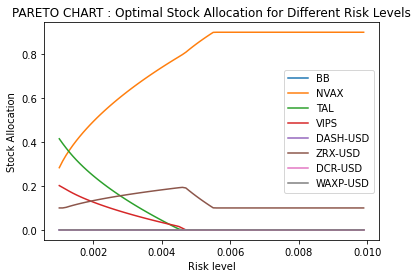

In [ ]:
# generating the dataframe for proportions of the portfolio for each risk limit
from matplotlib.pyplot import figure
figure(figsize=(1800, 2000), dpi=80)
param_analysis = pd.DataFrame.from_dict(param_analysis, orient='index')
param_analysis.columns = ['BB','NVAX','TAL','VIPS','DASH-USD','ZRX-USD','DCR-USD','WAXP-USD']
param_analysis.plot()
plt.title('PARETO CHART : Optimal Stock Allocation for Different Risk Levels')
plt.xlabel('Risk level')
plt.ylabel('Stock Allocation')
plt.show()


In [ ]:
# subset
risk = list(returns.keys()) # coerce dict_keys to a list
print(risk)
reward = list(returns.values()) # coerce dict_values to a list
print(reward) # we aren't allowed to name our value 'return' - this is a reserved name.

[0.001, 0.0011, 0.0012000000000000001, 0.0013000000000000002, 0.0014000000000000002, 0.0015000000000000002, 0.0016000000000000003, 0.0017000000000000003, 0.0018000000000000004, 0.0019000000000000004, 0.0020000000000000005, 0.0021000000000000003, 0.0022000000000000006, 0.002300000000000001, 0.0024000000000000007, 0.0025000000000000005, 0.0026000000000000007, 0.002700000000000001, 0.002800000000000001, 0.0029000000000000007, 0.003000000000000001, 0.003100000000000001, 0.003200000000000001, 0.003300000000000001, 0.003400000000000001, 0.0035000000000000014, 0.003600000000000001, 0.003700000000000001, 0.0038000000000000013, 0.0039000000000000016, 0.004000000000000002, 0.004100000000000001, 0.0042000000000000015, 0.004300000000000002, 0.004400000000000001, 0.004500000000000001, 0.004600000000000002, 0.004700000000000002, 0.004800000000000002, 0.004900000000000002, 0.005000000000000002, 0.005100000000000002, 0.005200000000000002, 0.005300000000000002, 0.005400000000000002, 0.00550000000000000

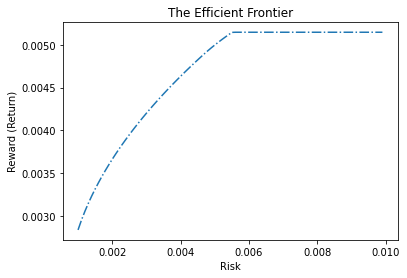

In [ ]:
# plot! pylab makes it easy
from pylab import *
plot(risk, reward, '-.')
title('The Efficient Frontier')
# Get x and y label
xlabel('Risk')
ylabel('Reward (Return)')
# Displaying the graph
plt.show()

# Conclusion

* While visualizing the time-series distribution, we saw an insight that the stocks BB, TAL and Vips are highly volatile (high risk and high returns), while crypto Waxp does not have much variation showing low returns that means risk aligned to it is also low.

* Based on previous results, we can get the trend and covariance which helps us get an idea of diversity in the portfolio. If the covriance is positive, then it means that the stocks are moving in the same direction. If the covariance is negative, then it means that the assets are moving in different directions (one returns profit, the other returns loss) and is a more balanced portfolio.

* While performing the portfolio optimization, we consider the risk level 0.0020000000000000005, the less aggressive one. When we see the results, the chosen portfolio shows a proportion of 0.495 for NVAX, 0.245 for TAL, 0.126 for VIPS and 0.133 for ZRX-USD. We run the Monte-Carlo simulation with 10,000 simulations to get the probability with which selected portfolio will lose money at the above mentioned risk. When we run the Monte-Carlo simulation we get a 46.97% of probability to lose money.

* When we run the simulation and see the density plot, the selected portfolio returns shows a normally distributed graph that helps to determine the expected return and risk aligned with the stocks.

* After we choose the portfolio, we compare the returns of our portfolio with S&P 500 and Dow Jones. We observed that selected portfolio has a negative returns for year 2021. This signifies that it would be better to invest in S&P or Dow Jones rather than investing in the chosen portfolio in the year 2021.

* While visualizing we can see in the efficient frontier graph that at risk 0.007, the plateau is reached. So, if we increase the risk no change can be seen in the rewards/returns. After that, we performed Integer Programming to restrict the model to select at least one crypto and one stock with at least 10% return. Here, we can see in the efficient frontier graph the plateau is reached at risk 0.006.

# Group Member Contributions

1. Saqib Saqib - Worked on Portfolio Optimization, Monte-Carlo simulation, Data Analysis and Integer Programming
2. Aniket Jana - Worked on Data Exploration and Preparation
3. Arpit Mehta - Worked on Portfolio Optimization.
4. Varun Bansal - Worked on Integer Programming Linear Optimization and 5 mins video presentation.

# References

* Assignment of Market Caps to Groups (Google spreadsheet):<br>
https://docs.google.com/spreadsheets/d/1kBIR3q5ShPmK6aXEtCbNr8LZeMogrm-R1OmWHNPDToM/edit?usp=sharing

* Portfolio allocation and Ms. Womack (class example):<br>
https://drive.google.com/file/d/170F2-JtXlrV1iKOLzHFGqtDVTCVzh8Yl/view?usp=sharing 

* Downloading real-time stock data from Yahoo Finance API:<br>
https://drive.google.com/file/d/1cQxGg7hdXfqMaUyBmYTk8kH9JTTwLLJR/view?usp=sharing 

* Yahoo! Finance probably has all the background information you need:<br>
https://finance.yahoo.com/
